<a href="https://colab.research.google.com/github/scacc018/jupyter/blob/master/3105_Shayna_Timelapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and tools

In [6]:
import gdal, ogr, osr
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
!pip install pyproj
print ('imports complete')

imports complete


In [7]:
from glob import glob # File manipulation
!pip install geopandas 
import geopandas as gpd

In [8]:
!pip install rasterio 
import rasterio as rio
from rasterio.plot import show
!pip install earthpy 
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [0]:
%matplotlib inline

# Link Google Drive to access files

In [10]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Open the three true colour bands for Landsat 8 image (4 = Red, 3 = green, 2 = blue)

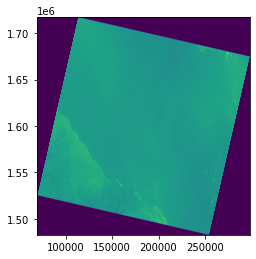

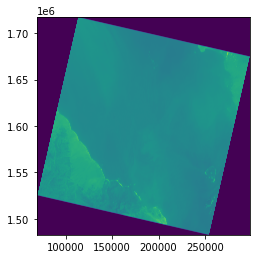

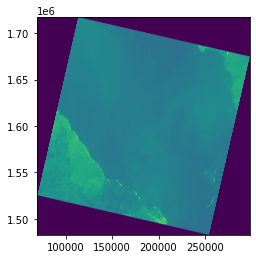

In [11]:
filepath1 = '/content/drive/My Drive/data/LC08_L1TP_167050_20200229_20200313_01_T1_B2.TIF'
filepath2 = '/content/drive/My Drive/data/LC08_L1TP_167050_20200229_20200313_01_T1_B3.TIF' 
filepath3 = '/content/drive/My Drive/data/LC08_L1TP_167050_20200229_20200313_01_T1_B4.TIF'

raster1 = rio.open(filepath1)
raster2 = rio.open(filepath2)
raster3 = rio.open(filepath3)

show((raster1, 1))
show((raster2, 1))
show((raster3, 1))

# Plot each band to see how they look, make sure they are correct

Text(0.5, 1.0, 'Blue')

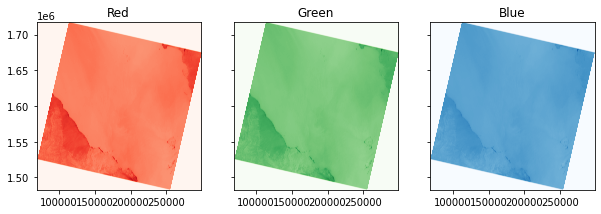

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

show((raster3, 1), cmap='Reds', ax=ax1)
show((raster2, 1), cmap='Greens', ax=ax2)
show((raster1, 1), cmap='Blues', ax=ax3)

ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")


# Begin plotting RGB image

In [13]:
#Turn bands into numpy arrays so that they can be plotted
red = raster3.read(1)
green = raster2.read(1)
blue = raster1.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.3159913535689427
0.0 - 1.0 mean: 0.3434793608635456
0.0 - 1.0 mean: 0.3824547278066953


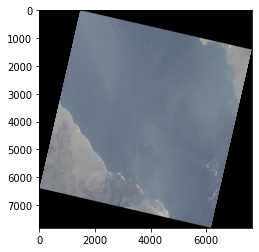

In [14]:
# Create RGB natural color composite
rgb1 = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb1)


In [15]:
# To save the image to your Google Drive:
imageFile = '/content/drive/My Drive/data/twenty1.tif'
plt.imshow(rgb1)
plt.savefig(imageFile)
plt.close()
print("saved")

saved


# Plot other Landsat scenes that will be merged to make the 2020 image for the timelapse

In [0]:
filepath1 = '/content/drive/My Drive/data/LC08_L1TP_167051_20200229_20200313_01_T1_B2.TIF'
filepath2 = '/content/drive/My Drive/data/LC08_L1TP_167051_20200229_20200313_01_T1_B3.TIF'
filepath3 = '/content/drive/My Drive/data/LC08_L1TP_167051_20200229_20200313_01_T1_B4.TIF'

raster1 = rio.open(filepath1)
raster2 = rio.open(filepath2)
raster3 = rio.open(filepath3)


In [17]:
red = raster3.read(1)
green = raster2.read(1)
blue = raster1.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.4043362315421663
0.0 - 1.0 mean: 0.42096209820003955
0.0 - 1.0 mean: 0.4498874942447335


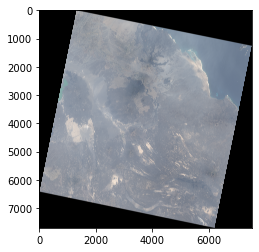

In [18]:
# Create RGB natural color composite
rgb2 = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb2)

In [19]:
# To save the image to your Google Drive:
imageFile = '/content/drive/My Drive/data/twenty2.tif'
plt.imshow(rgb2)
plt.savefig(imageFile)
plt.close()
print("saved")

saved


In [0]:
filepath1 = '/content/drive/My Drive/data/LC08_L1TP_168050_20200307_20200314_01_T1_B2.TIF'
filepath2 = '/content/drive/My Drive/data/LC08_L1TP_168050_20200307_20200314_01_T1_B3.TIF'
filepath3 = '/content/drive/My Drive/data/LC08_L1TP_168050_20200307_20200314_01_T1_B4.TIF'

raster1 = rio.open(filepath1)
raster2 = rio.open(filepath2)
raster3 = rio.open(filepath3)

In [21]:
red = raster3.read(1)
green = raster2.read(1)
blue = raster1.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.1687932200061362
0.0 - 1.0 mean: 0.17402989985603715
0.0 - 1.0 mean: 0.18316026737232521


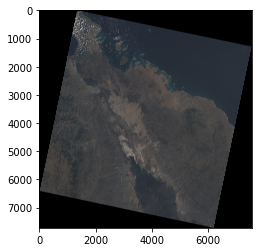

In [22]:
# Create RGB natural color composite
rgb3 = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb3)

In [23]:
# To save the image to your Google Drive:
imageFile = '/content/drive/My Drive/data/twenty3.tif'
plt.imshow(rgb3)
plt.savefig(imageFile)
plt.close()
print("saved")

saved


Normalized bands
0.0 - 1.0 mean: 0.2730917398541512
0.0 - 1.0 mean: 0.2772756452505008
0.0 - 1.0 mean: 0.28047575509473605


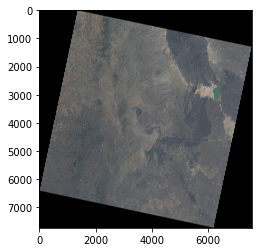

In [24]:
filepath1 = '/content/drive/My Drive/data/LC08_L1TP_168051_20200307_20200314_01_T1_B2.TIF'
filepath2 = '/content/drive/My Drive/data/LC08_L1TP_168051_20200307_20200314_01_T1_B3.TIF'
filepath3 = '/content/drive/My Drive/data/LC08_L1TP_168051_20200307_20200314_01_T1_B4.TIF'

raster1 = rio.open(filepath1)
raster2 = rio.open(filepath2)
raster3 = rio.open(filepath3)

red = raster3.read(1)
green = raster2.read(1)
blue = raster1.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

# Create RGB natural color composite
rgb4 = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb4)

In [25]:
# To save the image to your Google Drive:
imageFile = '/content/drive/My Drive/data/twenty4.tif'
plt.imshow(rgb4)
plt.savefig(imageFile)
plt.close()
print("saved")

saved


# Use merge function to merge the four RGB images for 2020 then save as a .PNG

In [37]:
from rasterio.merge import merge
import glob
filepath = '/content/drive/My Drive/data'
out_fp = os.path.join(filepath, '2020.tif')

search_criteria = "twenty*.tif"
q = os.path.join(filepath, search_criteria)
print(q)


/content/drive/My Drive/data/twenty*.tif


In [38]:
twenty = glob.glob(q)

twenty

['/content/drive/My Drive/data/twenty1.tif',
 '/content/drive/My Drive/data/twenty2.tif',
 '/content/drive/My Drive/data/twenty3.tif',
 '/content/drive/My Drive/data/twenty4.tif']

In [39]:
src_files_to_mosaic = []

for fp in twenty:
  src = rio.open(fp)
  src_files_to_mosaic.append(src)

src_files_to_mosaic

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[<open DatasetReader name='/content/drive/My Drive/data/twenty1.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/data/twenty2.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/data/twenty3.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/data/twenty4.tif' mode='r'>]

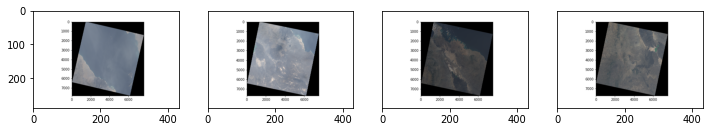

In [40]:
# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

In [51]:
%matplotlib inline

bounds=None
res=None
nodata=None
precision=7

# create destination array
dest = np.zeros((output_count, output_height, output_width), dtype=dtype)

# Merge function returns a single mosaic array and the transformation info
out_trans = merge(src_files_to_mosaic, bounds, res, nodata, precision)

# Plot the result
show(mosaic, cmap='twenty')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Deprecated; Use rasterio.merge instead
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored